# Pymaceuticals Inc.

**By:** Tania Barrera (*tsbarr*)

---

This Jupyter Notebook goes over my analysis for Challenge 5 of the UofT SCS EdX Data Bootcamp and uses the python module `matplotlib`. In this challenge, I was asked to generate a series of tables and figures needed for a technical report about a pharmaceutical study, as well as to provide a top-level summary of the study results.

## Prepare the Data

The setup starts importing the necessary dependencies, which are:

- `Path` from the `pathlib` module: to setup the file paths and make them compatible across operating systems.
- `.pyplot` from the `mathplotlib` module: to generate figures.
- `ListedColormap` from the `mathplotlib` module: to generate colormaps used to format some figures.
- `numpy` module: to generate some of the variables used for formatting.
- `pandas` module: to prepare the data and generate some of the figures.
- `.stats` from the `scipy` module: to calculate statistics with the data.

In [1]:
# Dependencies and Setup
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import scipy.stats as st


Then I input the data from two csv files: `Mouse_metadata.csv` and `Study_results.csv`. 


In [2]:

# Set the input paths
mouse_metadata_path = Path('data', 'Mouse_metadata.csv')
study_results_path = Path('data', 'Study_results.csv')

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




The mouse metadata includes 5 columns:

- `Mouse ID`: unique id for a mouse test subject that was identified with squamous cell carcinoma (SCC) tumors.
- `Drug Regimen`: the potential treatment for SCC that was tested in that mouse (possible values: 'Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'). *Note: the drug of interest is Capomulin.*
- `Sex`: the sex of the mouse (possible values: 'Female', 'Male').
- `Age_months`: the mouse's age in months.
- `Weight (g)`: the mouse's weight in grams.

In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


The study results contain a row of data for each timepoint and mouse measured and includes 4 columns:

- `Mouse ID`: the mouse id for the subject to which the data in the row corresponds.
- `Timepoint`: the day when the data in the row was taken. It can range from 0 to 45 days. *Note: Mouse ID and Timepoint together are the unique identifier of each row.*
- `Tumor Volume (mm3)`: the volume of the tumor for the mouse at the indicated timepoint, in cubic milimeters.
- `Metastatic Sites`: the number of metastatic sites found in the mouse at the indicated timepoint.

In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


I merge the two datasets using a left join on the `Mouse ID` column.

After merging, I make sure that the data contains only one row for each individual `Mouse ID` and `Timepoint` by first checking the number of mice, then using the `.value_counts()` function on the columns `Mouse ID` and `Timepoint`. This function tells us if there are any combinations that have more than one row. If there are, I drop that `Mouse ID` from the dataframe and finally check that the number of mice is the expected number after dropping the repeated data.

In [5]:
# Combine the data into a single DataFrame
all_data = (study_results
    .merge(
        mouse_metadata,
        how='left',
        on= 'Mouse ID'
    )
)

# Display the data table for preview
all_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# checking the number of mice

all_data['Mouse ID'].nunique()

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
all_data[['Mouse ID', 'Timepoint']].value_counts().head(10)


Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
dtype: int64

In [8]:
# Optional: Get all the data for the duplicate mouse ID.
all_data.loc[all_data['Mouse ID'] == 'g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = all_data.copy().loc[all_data['Mouse ID'] != 'g989']
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_data['Mouse ID'].nunique()

248

## Summary Statistics

I generate a top-level summary of the study using the `.groupby()` and `.aggregate()` methods. The data is grouped by `Drug Regimen` and then the mean, median, variance, standard deviation and standard error are calculated for the `Tumor Volume (mm3)` of each drug regimen.

In [11]:
# Generate a summary statistics table of:
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# group by drug regimen and aggregate using summary stats of tumor volume
summary_statistics = (clean_data
    .groupby('Drug Regimen', as_index=True)
    # based on: https://stackoverflow.com/a/43897124
    .aggregate(
        {
        'Tumor Volume (mm3)':
            ['mean','median','var','std','sem']
        }
    )
)
# visualize results
summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

The bar and pie charts were each generated using two separate methodologies: the `pandas` module and its method `.plot()` and the `mathplotlib` module and its `pyplot` interface, which includes the `.bar()` and `.pie()` methods for bar and pie charts, respectively.

### Bar chart: Counts by Drug Regimen

The bar charts show the number of data rows collected for each Drug Regimen. Since we already made sure that each row contains a unique Mouse ID/Timepoint pair during the cleaning process, we can just count the rows for each Drug Regimen. The dataframe is generated grouping by Drug Regimen and finding the size of each group with the `.size()` method. The values are sorted in descending order for plotting.

In [12]:
counts_by_regimen = (clean_data
    .groupby('Drug Regimen')
    .size()
    .sort_values(ascending=False)
)
counts_by_regimen

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
dtype: int64

In [13]:
# add alpha to colors, so it scales with the value
# based on: https://www.tutorialspoint.com/add-alpha-to-an-existing-matplotlib-colormap
# and: https://www.analyticsvidhya.com/blog/2020/09/colormaps-matplotlib/
cmap = ListedColormap('slateblue')
# repeat the same selected color 10 times
bar_colors = cmap(np.arange(10))
# set alpha according to data value, where the max value has an alpha of 1.0
bar_colors[:, -1] = counts_by_regimen/counts_by_regimen[0]


<Axes: title={'center': 'Observed Mouse Timepoints for each Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

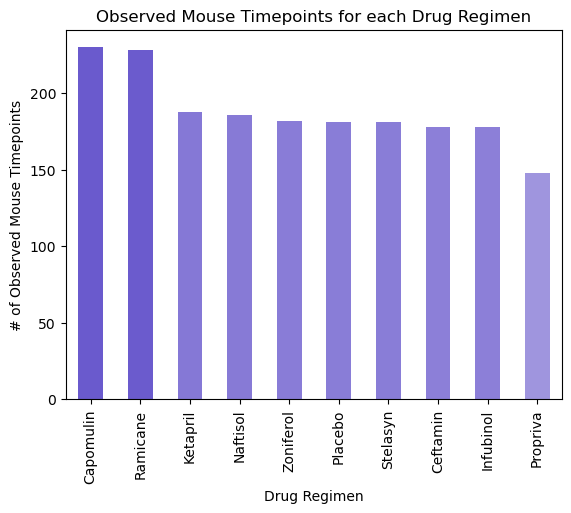

In [14]:

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

counts_by_regimen.plot(
        x='Drug Regimen',
        kind='bar',
        title='Observed Mouse Timepoints for each Drug Regimen',
        ylabel='# of Observed Mouse Timepoints',
        color=bar_colors
    )

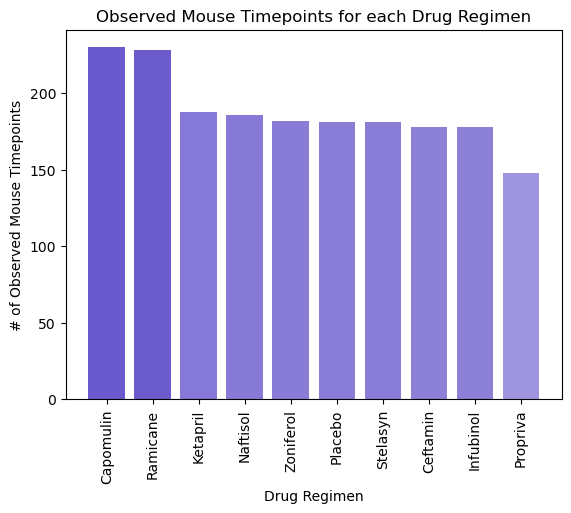

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(counts_by_regimen.index, counts_by_regimen.values,
    color=bar_colors
)
plt.title('Observed Mouse Timepoints for each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
# based on:
# https://www.pythoncharts.com/matplotlib/rotating-axis-labels/
plt.xticks(rotation=90)

plt.show()



### Pie charts: Percentages of Sexes in the Study

The pie charts show the percentage of Female and Male mice used in the study. I prepare the data to plot similarly to the data used for the above bar charts, but grouping by `Sex` instead of `Drug Regime`.

In [16]:
counts_by_sex = (clean_data
    .groupby('Sex')
    .size()
    .sort_values(ascending=False)
)
counts_by_sex


Sex
Male      958
Female    922
dtype: int64

In [17]:
# set colors to use in pie chart
pie_colors = ['indianred', 'peru']

<Axes: title={'center': 'Percentage of Male and Female Mice Tested'}, ylabel='Sex'>

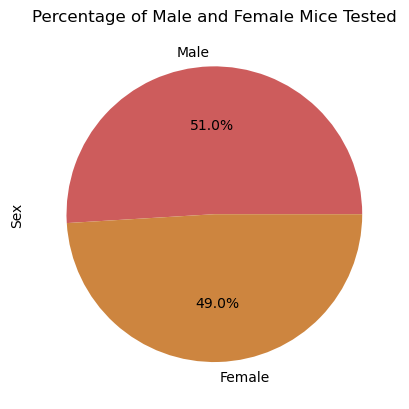

In [18]:

# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts_by_sex.plot(
    y='Sex',
    ylabel='Sex',
    title='Percentage of Male and Female Mice Tested',
    kind='pie',
    autopct='%1.1f%%',
    colors=pie_colors
)


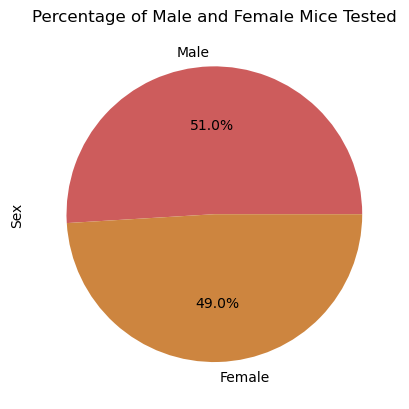

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(
    counts_by_sex.values,
    labels=counts_by_sex.index,
    autopct='%1.1f%%',
    colors=pie_colors
)
plt.ylabel('Sex')
plt.title('Percentage of Male and Female Mice Tested')

plt.show()

## Quartiles, Outliers and Boxplots

Now we want to visualize the final tumor volume across four treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. To do this, I first need to find the last timepoint for each mouse, which I do grouping by the Mouse ID and finding the maximum timepoint. Then, I use this dataset and merge it to the clean dataframe that contains all the details to get the tumor volume at those timepoints.

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = (clean_data
    .groupby('Mouse ID')
    .aggregate(
        {'Timepoint': 'max'}
    )
    .reset_index(drop=False)
)
last_timepoints.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [21]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoints = last_timepoints.merge(clean_data, how='left')
last_timepoints.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


Then, I need filter the data that we want to visualize, as well as identify if there are any outliers. I do this in a for loop that goes through the data in each of the target regimens and adds it to a list that we will use to generate the boxplot. It also calculates the first and third quartiles within each regimen and uses them to get the interquartile range and set the lower and upper bounds for identifying outliers. After the loop, the data for the boxplot figure is in the `tumor_volumens_list` and the possible outliers for each drug regimen is printed out.

In [22]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in regimen_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    these_mice = (last_timepoints
        .loc[
            last_timepoints['Drug Regimen'] == regimen, 
            ['Tumor Volume (mm3)']
        ]
    )
    # add subset
    tumor_volumes_list.append(list(these_mice['Tumor Volume (mm3)']))

    # Determine outliers using upper and lower bounds
    q1 = these_mice['Tumor Volume (mm3)'].quantile(.25)
    q3 = these_mice['Tumor Volume (mm3)'].quantile(.75)

    iqr = q3 - q1

    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)

    outliers = (these_mice
        .loc[
            (these_mice['Tumor Volume (mm3)'] > upper_bound) | \
            (these_mice['Tumor Volume (mm3)'] < lower_bound),
            'Tumor Volume (mm3)'
        ]
    )
    
    # print results
    print(f"{regimen}\n---\nIQR: {iqr:.5f}\n---\nPotential outliers:\n{outliers}\n------------\n")



Capomulin
---
IQR: 7.78186
---
Potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
------------

Ramicane
---
IQR: 9.09854
---
Potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
------------

Infubinol
---
IQR: 11.47714
---
Potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
------------

Ceftamin
---
IQR: 15.57775
---
Potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
------------



We see that there is only one possible outlier: 36.32 in the Infubinol regimen. Now, I use the generated list to display the data for each treatment group in a boxplot. The outlier is highlighted with red.

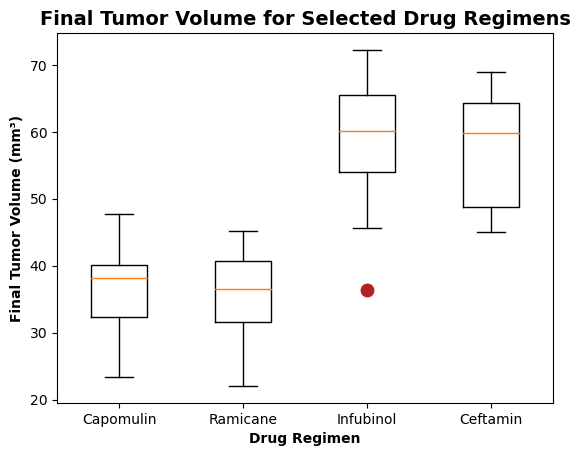

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(
    x = tumor_volumes_list,
    labels = regimen_list,
    flierprops={
        'markerfacecolor': 'firebrick',
        'markersize': 10,
        'markeredgecolor': 'none'
    }
)
plt.ylabel(
    'Final Tumor Volume (mm\u00b3)',
    fontdict={'weight': 700}
)
plt.xlabel(
    'Drug Regimen',
    fontdict={'weight': 700}
)
plt.title(
    'Final Tumor Volume for Selected Drug Regimens',
    fontdict={'weight': 700, 'size': 14})


plt.show()

## Line and Scatter Plots

We now shift to visualizing data from the Capomulin Drug Regimen, which is the drug of interest for Pymaceuticals. First I generate a line plot showing tumor volume vs timepoint for a single mouse treated with Capumolin. In this case, I select data from the mouse with ID 'L509'.

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# using: mouse l509

mouse_l509_df = (clean_data
    .copy()
    .loc[
        clean_data['Mouse ID'] == 'l509',
        ['Mouse ID', 'Drug Regimen','Timepoint', 'Tumor Volume (mm3)']
    ]
)

mouse_l509_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
231,l509,Capomulin,0,45.000000
253,l509,Capomulin,5,45.851193
539,l509,Capomulin,10,46.759074
881,l509,Capomulin,15,47.488599
982,l509,Capomulin,20,48.070452
1146,l509,Capomulin,25,44.006257
1414,l509,Capomulin,30,44.708055
1499,l509,Capomulin,35,40.207288
1723,l509,Capomulin,40,40.770813
1771,l509,Capomulin,45,41.483008


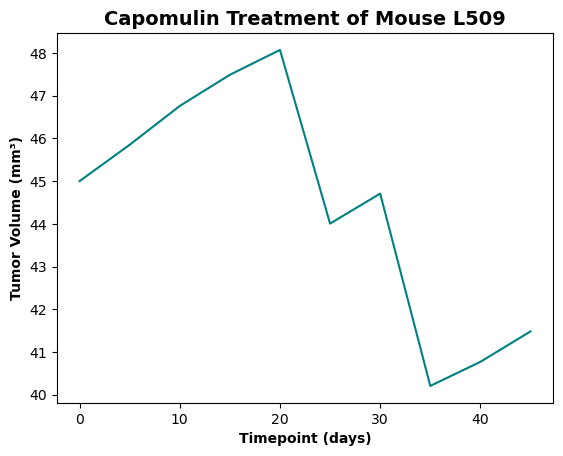

In [25]:
# https://datatofish.com/line-chart-python-matplotlib/

plt.plot(
    mouse_l509_df['Timepoint'],
    mouse_l509_df['Tumor Volume (mm3)'],
    color='teal'
)
plt.xlabel(
    'Timepoint (days)',
    fontdict={'weight': 700}
)
plt.ylabel(
    'Tumor Volume (mm\u00b3)',
    fontdict={'weight': 700}
)
plt.title(
    'Capomulin Treatment of Mouse L509',
    fontdict={'weight': 700, 'size': 14}
)

plt.show()



Now, we are interested in exploring the relationship between the weight of the mouse and its average tumor volume for the Capomulin treatment. To do this, I first generate the data filtering to keep the Capomulin regimen data only, grouping by Mouse ID (and weight, just to preserve that data in out dataframe) and aggregating by average tumor volume. Then, I plot the data in a scatterplot.

In [26]:
# Get data for scatterplot

weight_volume_df = (clean_data
    .copy()
    .loc[
        clean_data['Drug Regimen'] == 'Capomulin',
        ['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)']
    ]
    .groupby(['Mouse ID', 'Weight (g)'], as_index=False)
    .aggregate({'Tumor Volume (mm3)': 'mean'})
)
weight_volume_df

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


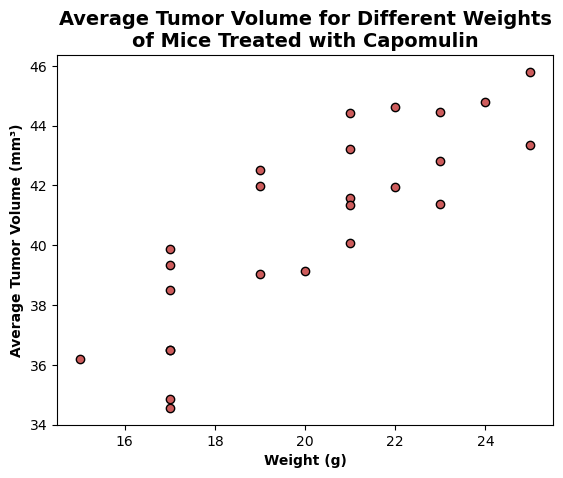

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

plt.scatter(
    x=weight_volume_df['Weight (g)'],
    y=weight_volume_df['Tumor Volume (mm3)'],
    color='indianred',
    edgecolors='k'
)

plt.xlabel(
    'Weight (g)',
    fontdict={'weight': 700}
)
plt.ylabel(
    'Average Tumor Volume (mm\u00b3)',
    fontdict={'weight': 700}
)
plt.title(
    'Average Tumor Volume for Different Weights\nof Mice Treated with Capomulin',
    fontdict={'weight': 700, 'size': 14}
)

plt.show()

## Correlation and Regression

To look further into the relationship between mice weight and tumor volume in the Capomulin regimen, I run a linear regression model using `scipy.stats.linregress()` with weight as the x variable and tumor volume as the y variable. From this model, I get the r-value, or correlation coefficient, and use the intercept and slope to plot the regression model into the previous scatter plot.

The correlation coefficient between mouse weight and the average tumor volume for mice treated with Capomulin is 0.84. This indicates a positive relationshop between the two variables, which can also be appreciated in the plot.

The correlation between mouse weight and the average tumor volume is 0.84


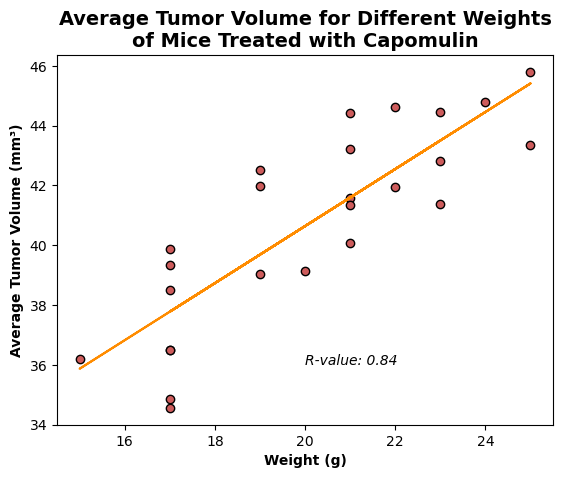

In [28]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Based on:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress

x_values = weight_volume_df['Weight (g)']
y_values = weight_volume_df['Tumor Volume (mm3)']

weight_volume_res = st.linregress(
    x=x_values,
    y=y_values
)
rval = weight_volume_res.rvalue
print(f"The correlation between mouse weight and the average tumor volume is {rval:.2f}")

# plot the scatterplot with the linear regression line

plt.scatter(
    x=x_values,
    y=y_values,
    color='indianred',
    edgecolors='k'
)
plt.plot(
    x_values,
    weight_volume_res.intercept + weight_volume_res.slope*x_values,
    color='darkorange'
)

plt.text(
    x=20,
    y=36,
    s=f"R-value: {rval:.2f}",
    fontdict={'fontstyle': 'italic', 'size': 10}
)

plt.xlabel(
    'Weight (g)',
    fontdict={'weight': 700}
)
plt.ylabel(
    'Average Tumor Volume (mm\u00b3)',
    fontdict={'weight': 700}
)
plt.title(
    'Average Tumor Volume for Different Weights\nof Mice Treated with Capomulin',
    fontdict={'weight': 700, 'size': 14}
)



plt.show()
